In [5]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

X_train shape: (800, 9, 64, 64, 1)
y_train shape: (800, 64, 64, 1)


Model: "sequential_10"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv_lstm2d_24 (ConvLSTM2D)          │ (None, 9, 64, 64, 256)      │       2,369,536 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_24               │ (None, 9, 64, 64, 256)      │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 9, 64, 64, 256)      │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_lstm2d_25 (ConvLSTM2D)          │ (None, 9, 64, 64, 128)      │       1,769,984 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_25               │ (None, 9, 64, 64, 128)      │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 9, 64, 64, 128)      │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_lstm2d_26 (ConvLSTM2D)          │ (None, 64, 64, 64)          │         442,624 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_26               │ (None, 64, 64, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 64, 64, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 64, 64, 1)           │             577 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4,584,513 (17.49 MB)

 Trainable params: 4,583,617 (17.49 MB)

 Non-trainable params: 896 (3.50 KB)

Epoch 1/5
90/90 ━━━━━━━━━━━━━━━━━━━━ 150s 2s/step - loss: 0.1112 - val_loss: 0.0272
Epoch 2/5
90/90 ━━━━━━━━━━━━━━━━━━━━ 136s 2s/step - loss: 0.0236 - val_loss: 0.0206
Epoch 3/5
90/90 ━━━━━━━━━━━━━━━━━━━━ 136s 2s/step - loss: 0.0210 - val_loss: 0.0217
Epoch 4/5
90/90 ━━━━━━━━━━━━━━━━━━━━ 136s 2s/step - loss: 0.0209 - val_loss: 0.0205
Epoch 5/5
90/90 ━━━━━━━━━━━━━━━━━━━━ 135s 2s/step - loss: 0.0204 - val_loss: 0.0199
7/7 ━━━━━━━━━━━━━━━━━━━━ 12s 1s/step - loss: 0.0214
Test Loss: 0.021237559616565704
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


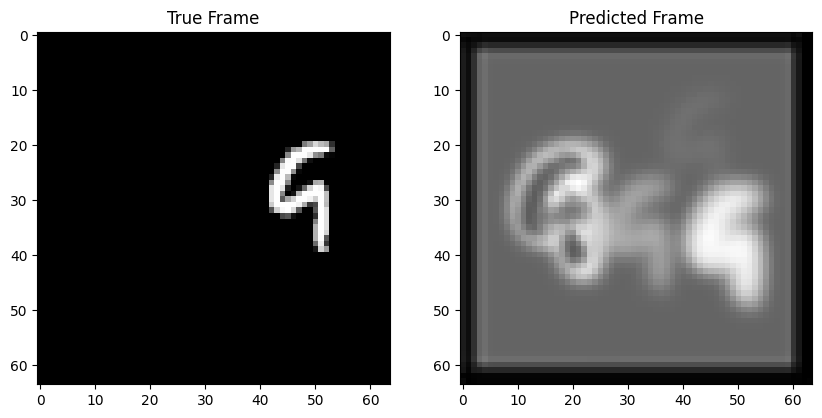

In [12]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import ConvLSTM2D, BatchNormalization, Conv2D,Dropout
import matplotlib.pyplot as plt

# Step 1: Generate Synthetic Dataset
def generate_moving_mnist(num_samples=1000, seq_length=10, image_size=64):
    # Load MNIST dataset
    mnist = tf.keras.datasets.mnist
    (x_train, _), (_, _) = mnist.load_data()
    x_train = x_train / 255.0  # Normalize to [0, 1]

    dataset = []
    for _ in range(num_samples):
        digit = x_train[np.random.randint(0, len(x_train))]  # Random digit
        trajectory = np.random.randint(0, image_size - 28, size=(seq_length, 2))  # Random trajectory

        sequence = []
        for t in range(seq_length):
            frame = np.zeros((image_size, image_size))
            x, y = trajectory[t]
            frame[x:x+28, y:y+28] = digit  # Place digit on frame
            sequence.append(frame)
        
        dataset.append(np.array(sequence))
    
    return np.array(dataset)

# Generate dataset
num_samples = 1000
seq_length = 10
image_size = 64
dataset = generate_moving_mnist(num_samples, seq_length, image_size)

# Split into train and test sets
train_data = dataset[:800]
test_data = dataset[800:]

# Prepare training data
X_train = train_data[:, :-1]  # First 9 frames (input)
y_train = train_data[:, -1]   # 10th frame (ground truth)

# Add channel dimension to X_train and y_train
X_train = np.expand_dims(X_train, axis=-1)  # Shape: (800, 9, 64, 64, 1)
y_train = np.expand_dims(y_train, axis=-1)  # Shape: (800, 64, 64, 1)

# Verify shapes
print("X_train shape:", X_train.shape)  # Should be (800, 9, 64, 64, 1)
print("y_train shape:", y_train.shape)  # Should be (800, 64, 64, 1)

# Step 2: Build the ConvLSTM Model
model = Sequential([
    # Input layer
    tf.keras.layers.InputLayer(input_shape=(seq_length - 1, image_size, image_size, 1)),  # Shape: (9, 64, 64, 1)

    # First ConvLSTM layer
    ConvLSTM2D(filters=256, kernel_size=(3, 3),
               padding='same', return_sequences=True),
    BatchNormalization(),
    Dropout(0.3),

    # Second ConvLSTM layer
    ConvLSTM2D(filters=128, kernel_size=(3, 3),
               padding='same', return_sequences=True),
    BatchNormalization(),
    Dropout(0.2),

    # Third ConvLSTM layer (no sequences here)
    ConvLSTM2D(filters=64, kernel_size=(3, 3),
               padding='same', return_sequences=False),
    BatchNormalization(),
    Dropout(0.2),

    # Final Conv3D layer to output the predicted frame
    Conv2D(filters=1, kernel_size=(3, 3),
           activation='sigmoid',
           padding='same',)
])

# Compile the model
model.compile(optimizer='adam', loss='mse')

# Print model summary
model.summary()

# Step 3: Train the Model
history = model.fit(
    X_train, y_train,
    batch_size=8,
    epochs=5,
    validation_split=0.1
)

# Step 4: Evaluate the Model
# Prepare test data
X_test = test_data[:, :-1]  # First 9 frames (input)
y_test = test_data[:, -1]   # 10th frame (ground truth)

# Add channel dimension to X_test and y_test
X_test = np.expand_dims(X_test, axis=-1)  # Shape: (200, 9, 64, 64, 1)
y_test = np.expand_dims(y_test, axis=-1)  # Shape: (200, 64, 64, 1)

# Evaluate the model
test_loss = model.evaluate(X_test, y_test)
print(f"Test Loss: {test_loss}")

# Step 5: Visualize Predictions
# Predict the next frame for the first test sample
predicted_frame = model.predict(X_test[:1])[0]

# Plot the true and predicted frames
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.title("True Frame")
plt.imshow(y_test[0].squeeze(), cmap='gray')

plt.subplot(1, 2, 2)
plt.title("Predicted Frame")
plt.imshow(predicted_frame.squeeze(), cmap='gray')

plt.show()